## Task 1) Logistic Regression - Data Preprocessing

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('assignments/train.csv')

In [4]:
nos_0=df['click'].value_counts()[0]
nos_1=df['click'].value_counts()[1]
frac_0_orig_data= nos_0/(nos_0+nos_1)
frac_1_orig_data= nos_1/(nos_0+nos_1)

In [5]:
frac_0_orig_data

np.float64(0.830194375235954)

In [6]:
frac_1_orig_data

np.float64(0.16980562476404604)

## ensuring data is balanced( same amount of 0's and 1's)

In [7]:
class_0 = df[df['click'] == 0]  
class_1 = df[df['click'] == 1]

class_0_sample = class_0.sample(n=40000, random_state=42)  
class_1_sample = class_1.sample(n=40000, random_state=42)

df2 = pd.concat([class_0_sample, class_1_sample])
df2 = df2.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
nos_sample_0=df2['click'].value_counts()[0]
nos_sample_1=df2['click'].value_counts()[1]
frac_0_sample_data= nos_sample_0/(nos_sample_0+nos_sample_1)
frac_1_sample_data= nos_sample_1/(nos_sample_0+nos_sample_1)

In [9]:
frac_0_sample_data

np.float64(0.5)

In [10]:
frac_1_sample_data

np.float64(0.5)

In [11]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [12]:
df2.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.323065e+19,1,14102104,1005,1,57fe1b20,5b626596,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,-1,23
1,1.466822e+18,1,14102701,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17614,320,50,1993,2,1063,-1,33
2,1.472443e+19,1,14102609,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
3,1.201425e+19,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79
4,1.397127e+19,1,14103022,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32


In [13]:
df2.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,8.000000e+04,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000
mean,9.194111e+18,0.500000,1.410256e+07,1004.933125,0.301675,0.998888,0.270800,18582.715362,318.308300,65.816250,2082.743887,1.458550,225.89065,50465.795625,79.039050
std,5.330830e+18,0.500003,2.956050e+02,1.077261,0.528934,0.500564,0.770649,5037.404219,19.901344,57.490921,618.626395,1.303717,359.87731,50053.724247,69.386466
min,4.073366e+14,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.00000,-1.000000,1.000000
25%,4.554876e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16688.000000,320.000000,50.000000,1800.000000,0.000000,35.00000,-1.000000,23.000000
50%,9.149309e+18,0.500000,1.410260e+07,1005.000000,0.000000,1.000000,0.000000,20108.000000,320.000000,50.000000,2295.000000,2.000000,39.00000,100003.000000,51.000000
75%,1.381768e+19,1.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21835.000000,320.000000,50.000000,2513.000000,3.000000,169.00000,100084.000000,79.000000
max,1.844666e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24042.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.00000,100248.000000,255.000000


## Inorder to Preprocess data ,  checking 
1) NA values
2) Dropping unnecessary columns
3) Encoding string column values

In [14]:
# no na values
df2.isna().sum(axis=0)

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [15]:
unique_names = df2['click'].unique()
print("Unique Names:", unique_names)
df2['click'].value_counts()

Unique Names: [1 0]


click
1    40000
0    40000
Name: count, dtype: int64

In [16]:
# dropping unnecessary columns 
df2=df2.drop(columns=['id','device_id','device_ip', 'device_model'])

In [17]:
from sklearn.preprocessing import LabelEncoder
def encode(series):
    le = LabelEncoder()
    return le.fit_transform(series)

In [18]:
# encoding site_id , site_domain, app_id ,app_domain, app_category 
df2['site_id']=encode(df2['site_id'])
df2['site_domain']=encode(df2['site_domain'])
df2['site_category']=encode(df2['site_category'])
df2['app_id']=encode(df2['app_id'])
df2['app_domain']=encode(df2['app_domain'])
df2['app_category']=encode(df2['app_category'])

In [19]:
print("df['site_domain'].unique():",df2['site_domain'].unique())
print("df['site_id'].unique():",df2['site_id'].unique())
print("df['site_category'].unique():",df2['site_category'].unique())
print("df['app_id'].unique():",df2['app_id'].unique())
print("df['app_domain'].unique():",df2['app_domain'].unique())
print("df['app_category'].unique():",df2['app_category'].unique())

df['site_domain'].unique(): [ 422  726 1145 ...   68 1121  874]
df['site_id'].unique(): [ 481 1120  152 ...  104  488 1337]
df['site_category'].unique(): [16  1  5  3 13  2 17 10  9  8  4 14  0 11  7  6 15 12]
df['app_id'].unique(): [1046  998  646 ...  901  266  225]
df['app_domain'].unique(): [29 21 41 56 33  6 49 27  3 59 23 51 42 22 15 11 20 14 13  4  9 36 48 34
 53 40 39  0 60 10 43 66 64 31 12 17 16 37 65  7 55  2 32 38  5 30 68 25
 54 28 19 45 24  1 62 61 63  8 46 52 57 44 47 18 26 58 50 35 69 67]
df['app_category'].unique(): [ 0  2 12 20 17 18 19 21 10 16  7 11  1  9  5 14  3 13  8  4 15  6]


In [20]:
df2.iloc[0]

click                      1
hour                14102104
C1                      1005
banner_pos                 1
site_id                  481
site_domain              422
site_category             16
app_id                  1046
app_domain                29
app_category               0
device_type                1
device_conn_type           0
C14                    16208
C15                      320
C16                       50
C17                     1800
C18                        3
C19                      167
C20                       -1
C21                       23
Name: 0, dtype: int64

## Perfrorming Train test split

In [21]:
#seperating train test columns
y=df2['click']
x=df2.drop(columns='click')
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)


In [22]:
fractions = y_test.value_counts(normalize=True)
print(fractions)

click
0    0.504437
1    0.495563
Name: proportion, dtype: float64


In [23]:
fractions = y_train.value_counts(normalize=True)
print(fractions)

click
1    0.501109
0    0.498891
Name: proportion, dtype: float64


## Task 2 - Logistic Regression -SGD

In [24]:
x_train_tensor=torch.tensor(x_train.to_numpy(),dtype=torch.float32)
y_train_tensor=torch.tensor(y_train.to_numpy(),dtype=torch.float32)
x_test_tensor=torch.tensor(x_test.to_numpy(),dtype=torch.float32)
y_test_tensor=torch.tensor(y_test.to_numpy(),dtype=torch.float32)

In [25]:
num_features = x_train.shape[1]

In [26]:
all_loss=[]
# leanring_rate = 0.00001
# num_epochs= 1

In [27]:
x_train_tensor.shape

torch.Size([64000, 19])

In [28]:
y_train_tensor.shape

torch.Size([64000])

In [29]:
#defining sigmoid, binary cross entropy loss fucntions
def sigmoid(a):
    return 1/(1+torch.exp(-a))

def Binary_Cross_Entropy(y_pred, y_actual):

    y_pred = torch.clamp(y_pred, min=1e-7, max=1-1e-7)
    return -torch.mean(y_actual * torch.log(y_pred) + (1 - y_actual) * torch.log(1 - y_pred))
    

$$
\text{Binary Cross-Entropy Loss (BCE)}: \quad \text{BCE}(y_{\text{pred}}, y_{\text{actual}}) = -\left( y_{\text{actual}} \log(y_{\text{pred}}) + (1 - y_{\text{actual}}) \log(1 - y_{\text{pred}}) \right)
$$

$$
\text{Gradient of BCE w.r.t. } y_{\text{pred}}: \quad \frac{\partial \text{BCE}}{\partial y_{\text{pred}}} = -\frac{y_{\text{actual}}}{y_{\text{pred}}} + \frac{1 - y_{\text{actual}}}{1 - y_{\text{pred}}}
$$

$$
\text{Gradient w.r.t. weights:} \quad \frac{\partial \text{BCE}}{\partial \text{weights}} = \left( \frac{\partial \text{BCE}}{\partial y_{\text{pred}}} \right) \cdot (y_{\text{pred}} (1 - y_{\text{pred}})) \cdot x_i
$$

$$
\text{Gradient w.r.t. bias:} \quad \frac{\partial \text{BCE}}{\partial \text{bias}} = \frac{\partial \text{BCE}}{\partial y_{\text{pred}}} \cdot (y_{\text{pred}} (1 - y_{\text{pred}}))
$$

$$
\text{Weight Update:} \quad \text{weights} = \text{weights} - \text{learning_rate} \cdot \frac{\partial \text{BCE}}{\partial \text{weights}}
$$

$$
\text{Bias Update:} \quad \text{bias} = \text{bias} - \text{learning_rate} \cdot \frac{\partial \text{BCE}}{\partial \text{bias}}
$$



In [30]:
x_train_tensor[0]

tensor([ 1.4103e+07,  1.0050e+03,  0.0000e+00,  1.5200e+02,  1.1450e+03,
         1.0000e+00,  1.0460e+03,  2.9000e+01,  0.0000e+00,  1.0000e+00,
         0.0000e+00,  1.5706e+04,  3.2000e+02,  5.0000e+01,  1.7220e+03,
         0.0000e+00,  3.5000e+01, -1.0000e+00,  7.9000e+01])

In [31]:
x_train_tensor.shape

torch.Size([64000, 19])

In [32]:
y_train.value_counts

<bound method IndexOpsMixin.value_counts of 35144    1
44706    1
1115     1
13008    1
32660    0
        ..
5307     1
57651    0
40753    0
19776    1
14148    1
Name: click, Length: 64000, dtype: int64>

In [33]:
all_loss=[]
# learning_rate = 0.001
num_epochs= 10

In [83]:
import torch
import numpy as np


input_size = x_train_tensor.shape[1]  
weights = torch.randn(input_size, dtype=torch.float32) * 0.01  
bias = torch.zeros(1, dtype=torch.float32) 

# Normalize your input features
x_train_tensor = (x_train_tensor - x_train_tensor.mean(dim=0)) / x_train_tensor.std(dim=0)


learning_rate = 0.01
num_epochs = 1000
all_loss = []

# Training loop
for epoch in range(num_epochs):
    print("epoch:", epoch)
    
    linear_output = torch.matmul(x_train_tensor, weights) + bias  # Linear transformation
    y_pred = sigmoid(linear_output)  # Sigmoid activation
    
    loss = Binary_Cross_Entropy(y_pred, y_train_tensor)
    all_loss.append(loss.item()) 

    error = y_pred - y_train_tensor 
    gradient_w = torch.matmul(x_train_tensor.T, error) / x_train_tensor.shape[0]  # Gradient w.r.t weights
    gradient_b = torch.mean(error)  

    # Update weights and bias
    weights -= learning_rate * gradient_w
    bias -= learning_rate * gradient_b
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

y_pred_final = (y_pred > 0.5).int()

# Print final predictions
print("Predictions:", y_pred_final.tolist())


epoch: 0
Epoch [1/1000], Loss: 0.6931
epoch: 1
Epoch [2/1000], Loss: 0.6929
epoch: 2
Epoch [3/1000], Loss: 0.6927
epoch: 3
Epoch [4/1000], Loss: 0.6925
epoch: 4
Epoch [5/1000], Loss: 0.6923
epoch: 5
Epoch [6/1000], Loss: 0.6921
epoch: 6
Epoch [7/1000], Loss: 0.6919
epoch: 7
Epoch [8/1000], Loss: 0.6917
epoch: 8
Epoch [9/1000], Loss: 0.6915
epoch: 9
Epoch [10/1000], Loss: 0.6913
epoch: 10
Epoch [11/1000], Loss: 0.6911
epoch: 11
Epoch [12/1000], Loss: 0.6909
epoch: 12
Epoch [13/1000], Loss: 0.6907
epoch: 13
Epoch [14/1000], Loss: 0.6905
epoch: 14
Epoch [15/1000], Loss: 0.6903
epoch: 15
Epoch [16/1000], Loss: 0.6901
epoch: 16
Epoch [17/1000], Loss: 0.6900
epoch: 17
Epoch [18/1000], Loss: 0.6898
epoch: 18
Epoch [19/1000], Loss: 0.6896
epoch: 19
Epoch [20/1000], Loss: 0.6894
epoch: 20
Epoch [21/1000], Loss: 0.6892
epoch: 21
Epoch [22/1000], Loss: 0.6891
epoch: 22
Epoch [23/1000], Loss: 0.6889
epoch: 23
Epoch [24/1000], Loss: 0.6887
epoch: 24
Epoch [25/1000], Loss: 0.6885
epoch: 25
Epoch [26

In [84]:
weights

tensor([ 0.0088, -0.0514,  0.0825, -0.0155, -0.0350, -0.0669,  0.0824, -0.0325,
        -0.0176, -0.0370, -0.1734, -0.0732, -0.0426,  0.2620, -0.0450, -0.0453,
        -0.0007, -0.1253, -0.1139])

In [85]:
bias

tensor([0.0048])

In [79]:
# Function to plot confusion matrix
# def plot_confusion_matrix(cm, classes):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.title('Confusion Matrix')
#     plt.show()

In [86]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [87]:
y_test_pred = torch.matmul(x_test_tensor, weights) + bias
y_test_pred = sigmoid(y_test_pred)

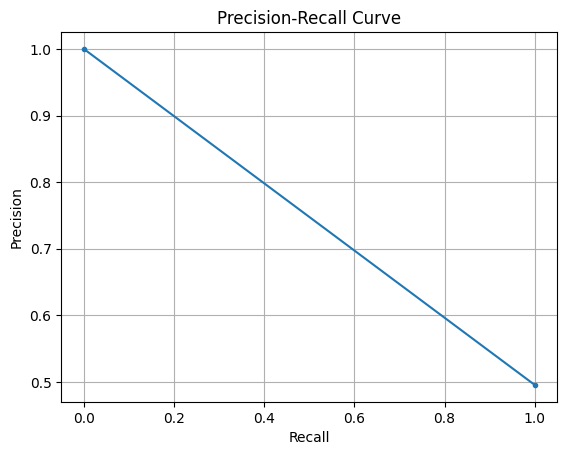

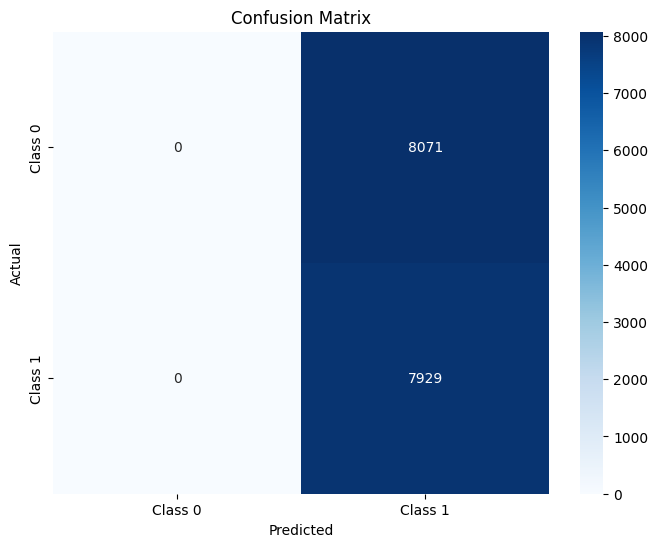

In [88]:

y_test_pred = (y_test_pred > 0.5).float().detach().numpy()  # Threshold to get binary predictions


precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)


plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)



# Define class labels
class_names = ['Class 0', 'Class 1']
plot_confusion_matrix(cm, class_names)